*Задание 4  
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими.Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.
Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована. Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.
Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.
Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100),
param_grid=parameters,
scoring='roc_auc',
cv=3.
Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score.
Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

*Дополнительные задания:  
1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.
2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.  
3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.4). Сколько классов содержит целевая переменная датасета? Выве
дите названия классов.  
5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.  
6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.  
7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.  
8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.  
9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).  
10). Удалите из датафрейма X поле с целевой переменной. Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака. Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат. Выведите описание полей датафрейма X с помощью метода describe.









Задание 1  
Импортируйте библиотеки pandas и numpy.  
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.  
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.  
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model. Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых. Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.  

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [1]:
import warnings

warnings.filterwarnings('ignore')

Функция load_boston загружает датасет. Загрузим его в переменную boston.

In [3]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Данные о недвижимости хранятся в массиве по ключу "data". Посмотрим поближе на эти данные.

In [4]:
data = boston["data"]

data.shape

(506, 13)

Мы видим, что это массив из 506 строк и 13 столбцов. Здесь каждая строка отвечает какому-то объекту (в нашем случае - объекту недвижимости), а столбцы - каким-то его характеристикам. Названия этих признаков хранятся в массиве по ключу "feature_names":

In [5]:
feature_names = boston["feature_names"]

feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Не совсем ясно, что представляют из себя эти признаки. Описание всего датасета можно получить по ключу "DESCR":

In [6]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

.. _boston_dataset:

Набор данных о ценах на жилье в Бостоне  
---------------------------

**Характеристики Набора данных:**  

:Количество экземпляров: 506

:Количество атрибутов: 13 числовых/категориальных прогностических. Медианное значение (атрибут 14) обычно является целевым значением.

:Информация об атрибутах (по порядку):
- Уровень преступности на душу населения в разбивке по городам
- ZN доля жилой земли, зонированной на участки площадью более 25 000 кв.футов.
- Доля промышленных площадей, не связанных с розничной торговлей, в расчете на город
- Фиктивная переменная реки ЧАС Чарльз (= 1, если тракт граничит с рекой; 0 в противном случае)
- Концентрация оксидов азота NOX (частей на 10 миллионов)
- Среднее количество комнат в жилом помещении по RM
- ВОЗРАСТНАЯ доля квартир, занятых владельцами, построенных до 1940 года
- Взвешенные расстояния до пяти бостонских центров занятости
- Радный индекс доступности к радиальным магистралям
- НАЛОГ на недвижимость с полной стоимостью -ставка налога за 10 000 долларов США
- Соотношение учащихся и учителей в разбивке по городам
- B 1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам
- LSTAT % более низкий статус населения
- MEDV Медианная стоимость домов, занятых владельцами, в 1000 долларов США

:Отсутствующие Значения атрибутов: Отсутствуют

: Создатель: Харрисон Д. и Рубинфельд Д.Л.

Это копия набора данных UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


Этот набор данных был взят из библиотеки StatLib, которая поддерживается в Университете Карнеги-Меллона.

Данные о ценах на жилье в Бостоне от Harrison, D. и Rubinfeld, D.L. 'Hedonic
цены и спрос на чистый воздух", J. Environ. Экономика и управление,
том 5, 81-102, 1978. Используется в Belsley, Kuh & Welsch, "Регрессионная диагностика
...", Wiley, 1980. N.B. Различные преобразования используются в таблице на
страницах 244-261 последней.

Данные о ценах на жилье в Бостоне использовались во многих работах по машинному обучению, в которых рассматриваются
проблемы регрессии.

.. тема:: Список литературы

- Белсли, Кух и Уэлш, "Регрессионная диагностика: выявление влиятельных данных и источников коллинеарности", Wiley, 1980. 244-261.
- Квинлан, Р. (1993). Сочетание обучения на основе примеров и обучения на основе моделей. В материалах Десятой Международной конференции по машинному обучению, 236-243, Массачусетский университет, Амхерст. Морган Кауфманн.

Массив с целевыми значениями (в нашем случае - ценами на недвижимость) можно получить по ключу "target":

In [7]:
target = boston["target"]

target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Создадим несколько таблиц DataFrame для более удобного хранения данных. В таблице X будут храниться признаки. В качестве названий для столбцов возьмём массив feature_names:

In [8]:
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Выведем информацию об этой таблице:

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Как видно из этой информации, данная таблица не содержит пропущенных значений.

Теперь создадим таблицу y, в которую запишем целевые значения:

In [10]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


В этой таблице также нет пропущенных значений.

**Обучение моделей**

Разбиение выборки на тренировочную и тестовую
Обычно при обучении моделей машинного обучения используют две выборки: тренировочную и тестовую. Первая нужна для того, чтобы обучить модель. Вторая - для проверки качества обученной модели: мы можем сравнить предсказанную на этих данных цену с реальной, поскольку она у нас тоже имеется.

Разбиение данных на тренировочную и тестовую выборку можно выполнить с помощью функции train_test_split из модуля sklearn.model_selection.

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

С помощью параметра test_size можно указать, какую часть данных мы хотим выделить под тест. Если подать сюда число из отрезка  [0,1) , то оно будет интерпретироваться как доля тестовых объектов. Если же подать число большее или равное 1, это будет число объектов в тестовой выборке.

*Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model. Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых. Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.* 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

Модель линейной регрессии по объекту  𝑥=(𝑥1,…,𝑥𝑛)  предсказывает значение целевой переменной, используя линейную функцию

𝑓(𝑥)=𝑤0+𝑤1⋅𝑥1+⋯+𝑤𝑛⋅𝑥𝑛.
 
Задача такой модели - в процессе обучения подобрать эти коэффициенты  𝑤𝑖  так, чтобы значение этой функции было как можно более близко к реальному целевому значению  𝑦  объекта  𝑥 .

Итак, чтобы обучить модель, мы используем метод .fit, в который передаём нашу тренировочную выборку:

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

Теперь, когда модель обучена, мы можем получить предсказанные значения на объектах X_test с помощью метода .predict:

In [65]:
y_pred = lr.predict(X_test)

y_pred.shape

(152, 1)

In [66]:
from sklearn.metrics import r2_score

In [67]:
metrics = pd.DataFrame(columns=['model','metrics'])

In [68]:
r2 = r2_score(y_test, y_pred)
print('Оценка r2 модели LinearRegression',r2)

Оценка r2 модели LinearRegression 0.7112260057484973


In [69]:
new_row = {'model':'LinearRegression', 'metrics': r2}
metrics = metrics.append(new_row, ignore_index=True)
metrics

,model,metrics
0,LinearRegression,0.711226


Задание 2  
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble. Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.  
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма. Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.  
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
regressor = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

Обучение модели

In [54]:
regressor.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

Предсказание моделил RandomForestRegressor

In [70]:
y_pred = regressor.predict(X_test)

y_pred.shape

(152,)

In [71]:
r2 = r2_score(y_test, y_pred)

In [72]:
new_row = {'model':'RandomForestRegressor', 'metrics': r2}
metrics = metrics.append(new_row, ignore_index=True)

In [73]:
metrics.sort_values(by='metrics', ascending=False)

,model,metrics
1,RandomForestRegressor,0.874726
0,LinearRegression,0.711226


По метрики r2 лучше всего работает модель RandomForestRegressor

*Задание 3   
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.  
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [78]:
feature = pd.Series(regressor.feature_importances_,index=feature_names).sort_values(ascending=False)
feature

LSTAT      0.415847
RM         0.402682
DIS        0.063973
CRIM       0.031676
PTRATIO    0.018081
AGE        0.014299
NOX        0.014269
B          0.012451
TAX        0.011525
INDUS      0.007138
RAD        0.005281
ZN         0.001543
CHAS       0.001236
dtype: float64

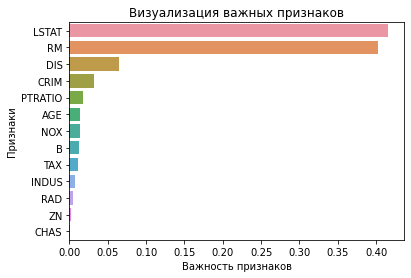

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature, y=feature.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

Два признака оказывающие наибольшее влияение LSTAT и RM
- LSTAT % более низкий статус населения
- Среднее количество комнат в жилом помещении по RM